# Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.

In [21]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#reading the dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [23]:
#looking at number of rows and columns
df.shape

(9994, 13)

In [24]:
#looking at the columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
#checking for any null value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [27]:
df.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [28]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


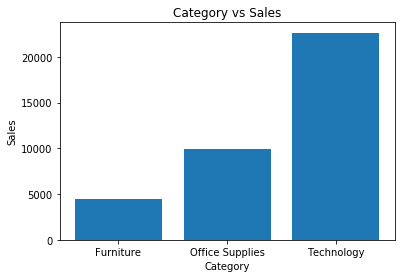

In [29]:
#visualising the category and sales column to find out which category has the maximum sale 
plt.bar(df['Category'],df['Sales'])
plt.title('Category vs Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Text(0.5, 1.0, 'Quantities ordered by each segment')

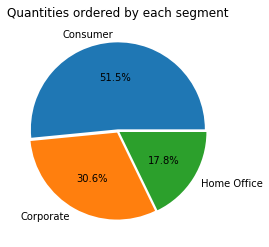

In [30]:
#visualising the quantities ordered by each segment
df1 = df.groupby('Segment')['Quantity'].sum().reset_index()
df1.head()
plt.pie(df1['Quantity'],labels=df['Segment'].unique(),autopct='%1.1f%%',explode=(0.02,0.02,0.02))
plt.title('Quantities ordered by each segment')

In [31]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

Text(0, 0.5, 'Number of Orders')

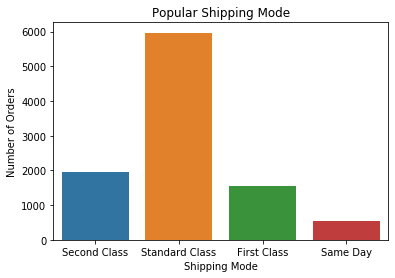

In [32]:
#looking at the most popular shipping mode
sns.countplot(df['Ship Mode'])
plt.title('Popular Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')

In [33]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

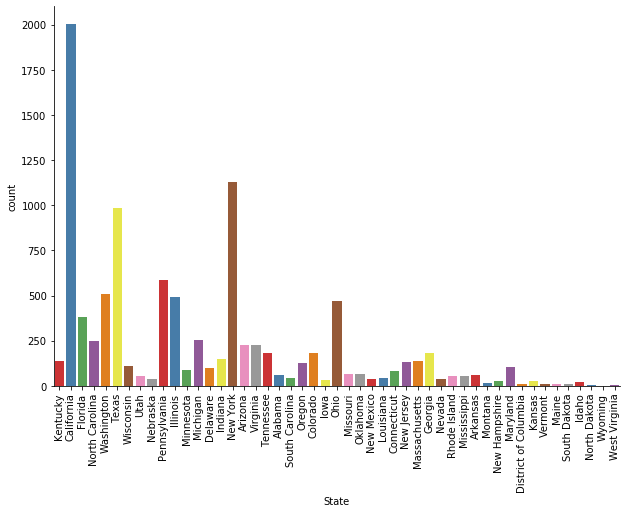

In [34]:
sns.catplot('State',data=df,kind='count',palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


Text(0.5, 1.0, 'Quantities ordered be each region')

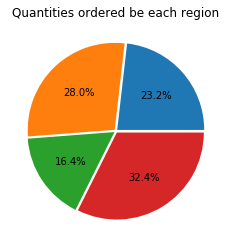

In [35]:
df_region = df.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02))
plt.title('Quantities ordered be each region')

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


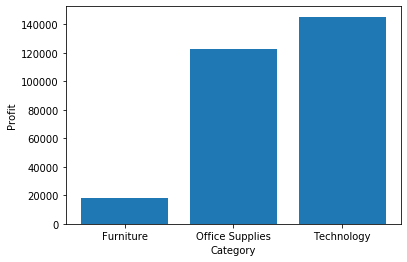

In [36]:
#looking at which category has the maximum profit
df_pro = df.groupby('Category')['Profit'].sum().reset_index()
print(df_pro)

plt.bar(df_pro['Category'],df_pro['Profit'])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

In [37]:
df_subc = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_subc

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


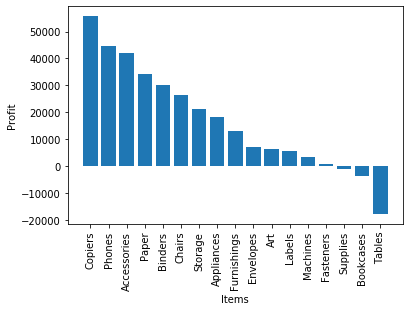

In [38]:
plt.bar(df_subc['Sub-Category'],df_subc['Profit'])
plt.xlabel('Items')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

In [39]:
df4 = df.groupby('Category')['Discount'].sum().reset_index()
df5 = df.groupby('Category')['Sales'].sum().reset_index()
df4 = df4.merge(df5)
df4

,Category,Discount,Sales
0,Furniture,368.89,741999.7953
1,Office Supplies,947.80,719047.0320
2,Technology,244.40,836154.0330


# Conclusion

1. "Comsumer" Segment has maximum number of orders.
2. "Technology" accounts for maximum sales.
3. "Standard Class" is the most popular shipping mode.
4. "Technology" category accounts for the maximum profit.
5. Some sub-category like "Tables" and "BookCases" have shown negative profit while Copiers and 
    Phones are the major profit making sub-category.
6. "West" and "East" region have more profit.